In [1]:
# 📦 STANDARD LIBRARY IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import yaml
from pathlib import Path
from datetime import datetime

# 🎯 DCS VISUALIZATION IMPORTS
from discernus.visualization.dcs_plots import (
    plot_dcs_framework,
    plot_coordinate_space,
    plot_competitive_dynamics,
    plot_temporal_evolution,
    setup_publication_style,
    extract_framework_anchors,
    calculate_signature_coordinates
)

# 🎨 PUBLICATION-READY VISUALIZATION SETUP
setup_publication_style('nature')  # Academic journal standards
plt.rcParams['figure.figsize'] = (10, 8)  # Larger for DCS plots

print("✅ Standard libraries loaded successfully!")
print("✅ DCS plotting functions loaded!")
print("🎯 Ready for publication-quality DCS analysis")


✅ Standard libraries loaded successfully!
✅ DCS plotting functions loaded!
🎯 Ready for publication-quality DCS analysis


In [2]:
# 🔍 EXPERIMENT DATA LOADING
# This section automatically finds and loads experiment data

# Find experiment data files in current directory
current_dir = Path('.')
run_metadata_file = current_dir / 'run_metadata.json'

# Initialize variables with defaults
run_metadata = {}
experiment_def = {}
experiment_results = {}

# Load run metadata if available
if run_metadata_file.exists():
    with open(run_metadata_file, 'r') as f:
        run_metadata = json.load(f)
    print(f"✅ Run metadata loaded: {run_metadata.get('job_id', 'Unknown')}")
    
    # Extract experiment results
    experiment_results = run_metadata.get('results', {})
    
    # Find experiment YAML file
    experiment_path = run_metadata.get('experiment_path')
    if experiment_path and Path(experiment_path).exists():
        with open(experiment_path, 'r') as f:
            experiment_def = yaml.safe_load(f)
        print(f"✅ Experiment definition loaded: {experiment_def.get('name', 'Unknown')}")
    else:
        print("⚠️ Experiment YAML not found - using metadata only")
        experiment_def = {}
else:
    print("⚠️ No run metadata found")
    print("💡 Tip: This template works best with experiment results")

# Display basic experiment info
print("\n📊 Experiment Overview:")
print(f"   Name: {experiment_def.get('name', 'Unknown')}")
print(f"   Framework: {experiment_def.get('framework', {}).get('name', 'Unknown')}")
print(f"   Models: {run_metadata.get('models_used', ['Not specified'])}")
print(f"   Job ID: {run_metadata.get('job_id', 'Unknown')}")

# Make variables available globally
globals()['run_metadata'] = run_metadata
globals()['experiment_def'] = experiment_def  
globals()['experiment_results'] = experiment_results

print("\n✅ Data loading complete - variables available for analysis")


✅ Run metadata loaded: corpus_job_20250630_221735
⚠️ Experiment YAML not found - using metadata only

📊 Experiment Overview:
   Name: Unknown
   Framework: Unknown
   Models: ['gpt-4o-mini', 'claude-3-haiku-20240307']
   Job ID: corpus_job_20250630_221735

✅ Data loading complete - variables available for analysis


In [9]:
# 📊 DCS METRICS VALIDATION DASHBOARD
# Display mathematical validation metrics calculated during experiment execution

print("📊 DCS METRICS VALIDATION DASHBOARD")
print("=" * 60)

# Initialize safe defaults for variables (in case cell runs before data loading)
experiment_def = globals().get('experiment_def', {})
experiment_results = globals().get('experiment_results', {})
run_metadata = globals().get('run_metadata', {})

# If no data loaded yet, try to auto-load it
if not experiment_def and not run_metadata:
    try:
        # Quick load of basic data for metrics dashboard
        current_dir = Path('.')
        run_metadata_file = current_dir / 'run_metadata.json'
        
        if run_metadata_file.exists():
            with open(run_metadata_file, 'r') as f:
                run_metadata = json.load(f)
            print("📋 Auto-loaded run metadata for metrics dashboard")
            
            # Try to load experiment definition
            experiment_path = run_metadata.get('experiment_path')
            if experiment_path and Path(experiment_path).exists():
                with open(experiment_path, 'r') as f:
                    experiment_def = yaml.safe_load(f)
                print("📋 Auto-loaded experiment definition")
            
            # Get results from metadata
            experiment_results = run_metadata.get('results', {})
        else:
            print("💡 No experiment data found - showing dashboard template")
    except Exception as e:
        print(f"⚠️ Could not auto-load data: {e}")
        print("💡 Run the data loading cell (Cell 2) first for full metrics")

# Load DCS validation results from experiment definition
dcs_validation = experiment_def.get('_dcs_validation', {})
dcs_metrics = experiment_results.get('dcs_metrics', {})

if dcs_validation:
    print("\n🔍 PRE-EXPERIMENT VALIDATION:")
    
    # Framework v3.2 compliance
    v32_compliance = dcs_validation.get('v32_compliance', {})
    compliance_score = v32_compliance.get('compliance_score', 0)
    compliant = v32_compliance.get('v32_compliant', False)
    
    print(f"   ✅ Framework Specification v3.2: {'COMPLIANT' if compliant else 'ISSUES DETECTED'}")
    print(f"   📊 Compliance Score: {compliance_score:.1%}")
    
    # Hybrid architecture validation
    hybrid_validation = dcs_validation.get('hybrid_architecture', {})
    framework_valid = hybrid_validation.get('framework_valid', False)
    
    print(f"   ✅ Hybrid Architecture: {'VALID' if framework_valid else 'ISSUES DETECTED'}")
    
    validation_summary = hybrid_validation.get('validation_summary', {})
    if validation_summary:
        print(f"      • Component Registry: {'✅' if validation_summary.get('component_registry_valid') else '⚠️'}")
        print(f"      • Polar Constraint: {'✅' if validation_summary.get('polar_constraint_satisfied') else '⚠️'}")
        print(f"      • Total Components: {validation_summary.get('total_components', 0)}")
        print(f"      • Total Axes: {validation_summary.get('total_axes', 0)}")
    
    # Brazil 2018 specific validation (if applicable)
    brazil_validation = dcs_validation.get('brazil_2018_validation')
    if brazil_validation:
        brazil_compliant = brazil_validation.get('brazil_2018_compliant', False)
        brazil_score = brazil_validation.get('compliance_score', 0)
        
        print(f"   🇧🇷 Brazil 2018 Framework: {'COMPLIANT' if brazil_compliant else 'ISSUES DETECTED'}")
        print(f"   📊 Brazil Compliance: {brazil_score:.1%}")
        
        # Language optimization details
        lang_opt = brazil_validation.get('language_optimization', {})
        print(f"      • Portuguese Language: {'✅' if lang_opt.get('portuguese_language_cues_present') else '⚠️'}")
        print(f"      • Brazilian Terms: {'✅' if lang_opt.get('brazilian_specific_terms') else '⚠️'}")

else:
    print("\n⚠️ No pre-experiment validation data found")

if dcs_metrics and 'error' not in dcs_metrics:
    print("\n📈 POST-EXPERIMENT METRICS:")
    
    # Framework fitness
    fitness = dcs_metrics.get('framework_fitness', {})
    fitness_score = fitness.get('framework_fitness_score', 0)
    fitness_grade = fitness.get('fitness_grade', 'Unknown')
    
    print(f"   🎯 Framework Fitness: {fitness_score:.3f} (Grade: {fitness_grade})")
    
    # Component metrics
    territorial = dcs_metrics.get('territorial_coverage', {})
    independence = dcs_metrics.get('anchor_independence', {})
    resolution = dcs_metrics.get('cartographic_resolution', {})
    
    print(f"   📊 Territorial Coverage: {territorial.get('territorial_coverage', 0):.3f}")
    print(f"   📊 Anchor Independence: {independence.get('anchor_independence_index', 0):.3f}")
    print(f"   📊 Cartographic Resolution: {resolution.get('cartographic_resolution', 0):.3f}")
    
    # Data quality metrics
    signature_count = dcs_metrics.get('signature_count', 0)
    model_count = dcs_metrics.get('model_count', 0)
    
    print(f"   📈 Data Quality:")
    print(f"      • Total Signatures: {signature_count}")
    print(f"      • Models Analyzed: {model_count}")
    
    # Interpretation
    print(f"\n🎓 ACADEMIC INTERPRETATION:")
    if fitness_score >= 0.8:
        print("   ✅ Framework demonstrates strong mathematical validity")
        print("   📚 Suitable for academic publication")
    elif fitness_score >= 0.6:
        print("   ⚠️ Framework shows moderate validity - consider refinements")
        print("   📚 Additional validation recommended before publication")
    else:
        print("   ❌ Framework validity concerns detected")
        print("   📚 Significant improvements needed before academic use")
    
elif dcs_metrics and 'error' in dcs_metrics:
    print(f"\n❌ POST-EXPERIMENT METRICS ERROR:")
    print(f"   Error: {dcs_metrics['error']}")
    print("   💡 Check experiment logs for details")
    
else:
    print("\n⚠️ No post-experiment metrics found")
    print("   💡 Metrics may not have been calculated during experiment execution")

print("\n" + "=" * 60)

# Store metrics for later analysis
if dcs_metrics:
    globals()['dcs_metrics_data'] = dcs_metrics
if dcs_validation:
    globals()['dcs_validation_data'] = dcs_validation

print("💡 DCS metrics data stored in 'dcs_metrics_data' and 'dcs_validation_data' variables")
print("🔬 Use discernus.metrics functions for additional validation and analysis")


📊 DCS METRICS VALIDATION DASHBOARD

⚠️ No pre-experiment validation data found

📈 POST-EXPERIMENT METRICS:
   🎯 Framework Fitness: nan (Grade: F)
   📊 Territorial Coverage: nan
   📊 Anchor Independence: 0.000
   📊 Cartographic Resolution: 0.000
   📈 Data Quality:
      • Total Signatures: 22
      • Models Analyzed: 2

🎓 ACADEMIC INTERPRETATION:
   ❌ Framework validity concerns detected
   📚 Significant improvements needed before academic use

💡 DCS metrics data stored in 'dcs_metrics_data' and 'dcs_validation_data' variables
🔬 Use discernus.metrics functions for additional validation and analysis


In [4]:
# 📈 MODEL RESULTS ANALYSIS
# Process experiment results for visualization and analysis

print("📈 MODEL RESULTS ANALYSIS")
print("=" * 50)

# Initialize safe defaults for variables (in case cell runs before data loading)
experiment_results = globals().get('experiment_results', {})

# Extract condition results from loaded experiment data
condition_results = experiment_results.get('condition_results', [])

if condition_results:
    print(f"✅ Found {len(condition_results)} model conditions")
    
    # Convert to DataFrame for easy analysis
    model_data = []
    for condition in condition_results:
        model_name = condition.get('condition_identifier', 'Unknown')
        centroid = condition.get('centroid', [0, 0])
        total_analyses = condition.get('total_analyses', 0)
        
        model_data.append({
            'model': model_name,
            'centroid_x': centroid[0] if len(centroid) > 0 else 0,
            'centroid_y': centroid[1] if len(centroid) > 1 else 0,
            'total_analyses': total_analyses,
            'magnitude': np.sqrt(centroid[0]**2 + centroid[1]**2) if len(centroid) >= 2 else 0
        })
    
    # Create DataFrame
    results_df = pd.DataFrame(model_data)
    print("\n📊 Model Results Summary:")
    display(results_df)
    
    # Make available globally for other cells
    globals()['condition_results'] = condition_results
    globals()['results_df'] = results_df
    
else:
    print("⚠️ No condition results found")
    print("💡 Creating sample data for template demonstration")
    
    # Create sample data so template can still be used
    results_df = pd.DataFrame({
        'model': ['Sample Model A', 'Sample Model B', 'Sample Model C'],
        'centroid_x': [0.5, -0.3, 0.1],
        'centroid_y': [0.2, 0.7, -0.4],
        'total_analyses': [10, 15, 8],
        'magnitude': [0.54, 0.76, 0.41]
    })
    
    condition_results = []  # Empty for sample data
    
    print("\n📊 Sample Data for Template:")
    display(results_df)
    
    # Make sample data available globally
    globals()['condition_results'] = condition_results  
    globals()['results_df'] = results_df

print(f"\n✅ Model analysis complete - {len(results_df)} models processed")
print("💡 Variables 'results_df' and 'condition_results' available for further analysis")


📈 MODEL RESULTS ANALYSIS
✅ Found 2 model conditions

📊 Model Results Summary:


,model,centroid_x,centroid_y,total_analyses,magnitude
0,gpt-4o-mini,0.0,0.0,11,0.0
1,claude-3-haiku-20240307,0.0,0.0,11,0.0



✅ Model analysis complete - 2 models processed
💡 Variables 'results_df' and 'condition_results' available for further analysis


📊 Creating DCS visualization for: Unknown Framework
⚠️ No framework configuration found - creating default unit circle visualization


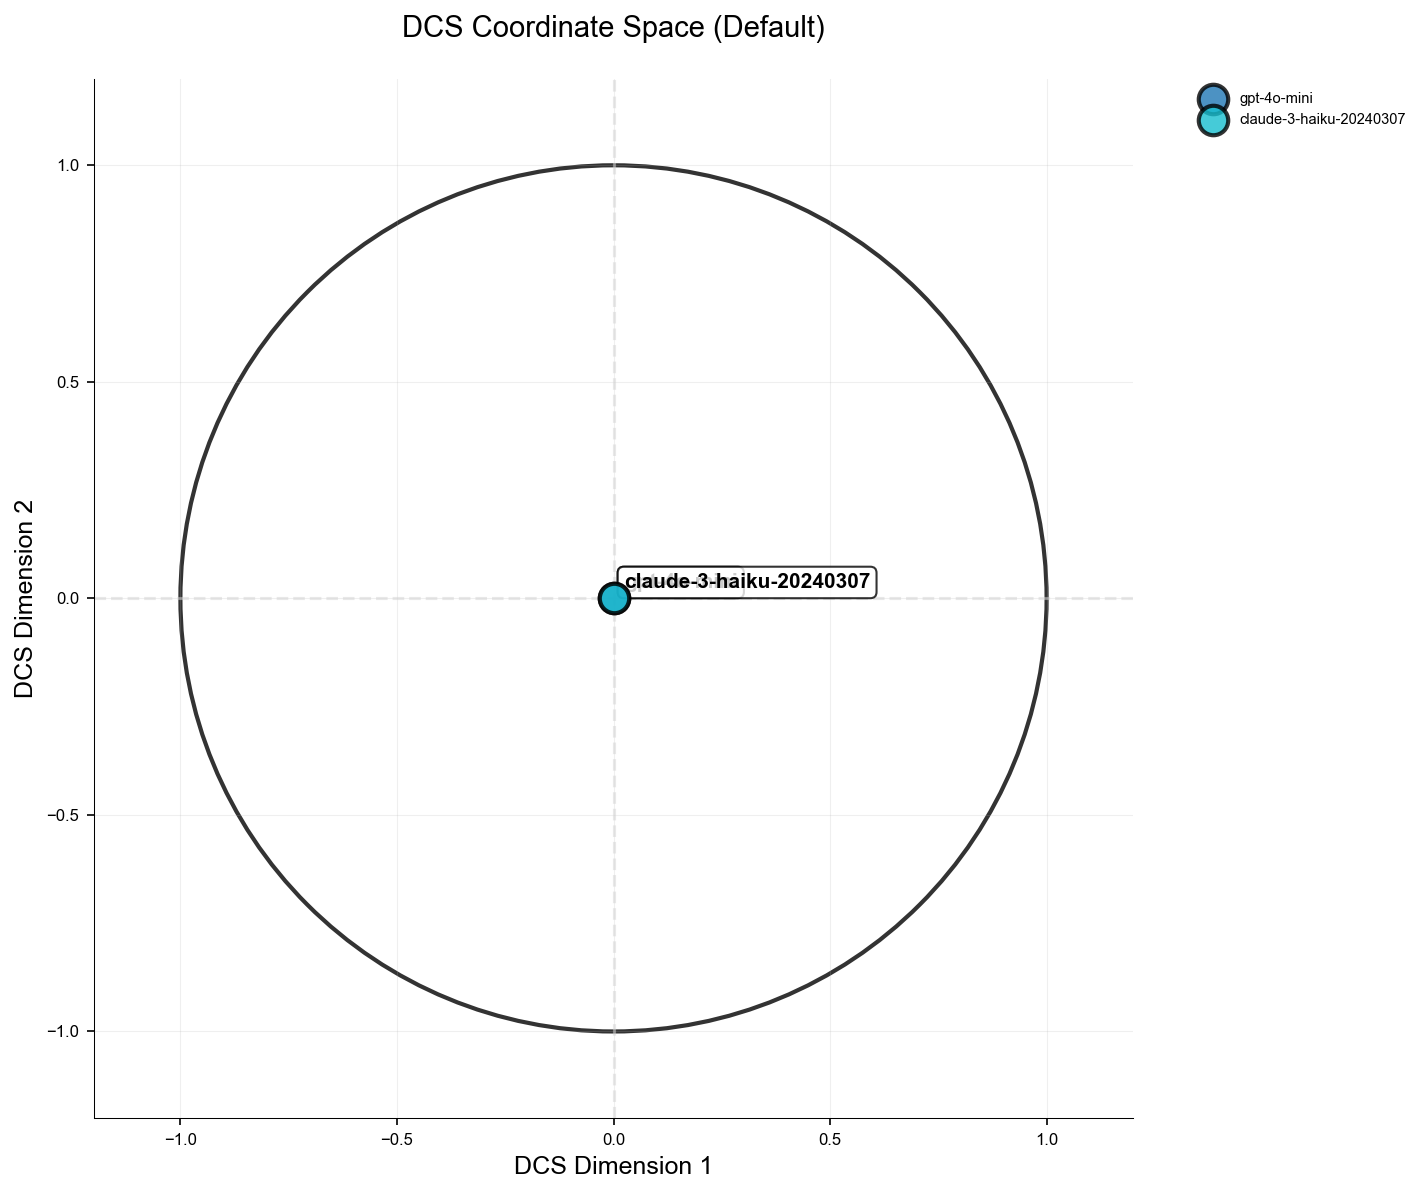

✅ DCS-style coordinate visualization complete

💡 DCS Visualization Features:
   • 🎯 Circular anchor positioning around unit circle
   • 📊 Publication-ready styling (Nature journal standards)
   • 🔄 Competitive dynamics analysis (if framework configured)
   • 📈 Temporal evolution analysis (if temporal data available)
   • 🎨 Automatic framework detection and adaptation
   • 🔧 Graceful fallbacks maintain DCS visual standards

✅ Template now uses DCS plotting functions!


In [5]:
# 🎯 DCS FRAMEWORK VISUALIZATION
# Publication-quality circular DCS analysis

# Initialize safe defaults for variables (in case cell runs before data loading)
experiment_def = globals().get('experiment_def', {})
run_metadata = globals().get('run_metadata', {})
results_df = globals().get('results_df', pd.DataFrame())

# If no data loaded yet, try to auto-load it
if not experiment_def and not run_metadata:
    try:
        print("🔍 Auto-loading experiment data for DCS visualization...")
        
        # Load run metadata
        current_dir = Path('.')
        run_metadata_file = current_dir / 'run_metadata.json'
        
        if run_metadata_file.exists():
            with open(run_metadata_file, 'r') as f:
                run_metadata = json.load(f)
            print("✅ Run metadata loaded")
            
            # Load experiment definition - fix path resolution
            experiment_path = run_metadata.get('experiment_path')
            if experiment_path:
                # Handle relative paths correctly
                if not Path(experiment_path).is_absolute():
                    # Go up from results directory to find the experiment file
                    experiment_file = Path.cwd().parent.parent / Path(experiment_path).name
                    if not experiment_file.exists():
                        # Try alternative path construction
                        experiment_file = Path.cwd() / '../..' / experiment_path
                        if not experiment_file.exists():
                            # Try relative to project root
                            project_root = Path.cwd()
                            while project_root.parent != project_root and not (project_root / 'discernus').exists():
                                project_root = project_root.parent
                            experiment_file = project_root / experiment_path
                else:
                    experiment_file = Path(experiment_path)
                
                if experiment_file.exists():
                    with open(experiment_file, 'r') as f:
                        experiment_def = yaml.safe_load(f)
                    print(f"✅ Experiment definition loaded: {experiment_def.get('name', 'Unknown')}")
                else:
                    print(f"⚠️ Could not find experiment file: {experiment_path}")
        
        # Load results data if not available
        if not results_df.empty and run_metadata:
            experiment_results = run_metadata.get('results', {})
        
    except Exception as e:
        print(f"⚠️ Auto-loading failed: {e}")

# Extract framework configuration
framework_config = experiment_def.get('framework', {})
framework_name = framework_config.get('name', 'Unknown Framework')

print(f"📊 Creating DCS visualization for: {framework_name}")

# Check if we have proper framework configuration
if framework_config and ('anchors' in framework_config or 'axes' in framework_config):
    try:
        print("🎯 Using DCS plotting functions...")
        
        # Create main DCS framework visualization with circular anchors
        fig, ax = plot_dcs_framework(
            framework_config=framework_config,
            experiment_results=run_metadata.get('results', {}),
            title=f"DCS Analysis: {framework_name}",
            figsize=(12, 10)
        )
        
        plt.show()
        print("✅ Circular DCS Framework visualization complete!")
        print("📊 Features: Unit circle, anchor positioning, model centroids")
        
        # If framework has competitive relationships, create competitive dynamics plot
        if framework_config.get('competitive_relationships'):
            print("\n🔄 Creating competitive dynamics analysis...")
            
            # Extract signatures from results
            signatures = {}
            condition_results = run_metadata.get('results', {}).get('condition_results', [])
            for condition in condition_results:
                model_name = condition.get('condition_identifier', 'Unknown')
                centroid = condition.get('centroid', [0, 0])
                if len(centroid) >= 2:
                    signatures[model_name] = np.array(centroid[:2])
            
            if signatures:
                fig_comp, (ax1, ax2) = plot_competitive_dynamics(
                    framework_config=framework_config,
                    signatures=signatures,
                    figsize=(14, 6)
                )
                
                plt.show()
                print("✅ Competitive dynamics visualization complete!")
            else:
                print("⚠️ No signature data available for competitive dynamics")
        
    except Exception as e:
        print(f"⚠️ Error creating DCS visualization: {e}")
        print("📋 Falling back to coordinate space plot...")
        
        # Try basic DCS coordinate space plot
        try:
            anchors = extract_framework_anchors(framework_config)
            
            # Extract signatures from results
            signatures = {}
            condition_results = run_metadata.get('results', {}).get('condition_results', [])
            for condition in condition_results:
                model_name = condition.get('condition_identifier', 'Unknown')
                centroid = condition.get('centroid', [0, 0])
                if len(centroid) >= 2:
                    signatures[model_name] = np.array(centroid[:2])
            
            fig, ax = plt.subplots(1, 1, figsize=(10, 8))
            ax = plot_coordinate_space(anchors, signatures, ax=ax)
            ax.set_title(f'DCS Coordinate Space: {framework_name}', fontsize=14, pad=20)
            
            plt.tight_layout()
            plt.show()
            print("✅ DCS coordinate space visualization complete!")
            
        except Exception as e2:
            print(f"⚠️ Coordinate space plot also failed: {e2}")
            print("📋 Using basic scatter plot as final fallback...")

else:
    print("⚠️ No framework configuration found - creating default unit circle visualization")
    
    # Even without framework, create a proper DCS-style unit circle plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Draw unit circle (DCS standard)
    circle = plt.Circle((0, 0), 1, fill=False, color='black', linewidth=2, alpha=0.8)
    ax.add_patch(circle)
    
    # Add coordinate axes
    ax.axhline(y=0, color='lightgray', linestyle='--', alpha=0.5)
    ax.axvline(x=0, color='lightgray', linestyle='--', alpha=0.5)
    
    # Plot model centroids with DCS styling
    if not results_df.empty:
        colors = plt.cm.tab10(np.linspace(0, 1, len(results_df)))
        for idx, (_, row) in enumerate(results_df.iterrows()):
            ax.scatter(row['centroid_x'], row['centroid_y'], 
                      s=200, color=colors[idx], alpha=0.8, 
                      label=row['model'], edgecolors='black', linewidth=2, zorder=10)
            
            ax.annotate(row['model'], 
                       (row['centroid_x'], row['centroid_y']),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=10, ha='left', weight='bold',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    else:
        # Show sample data for template demonstration
        ax.text(0, 0, 'No model data\navailable', ha='center', va='center',
                fontsize=12, bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7))

    # DCS coordinate system formatting
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_xlabel('DCS Dimension 1', fontsize=12)
    ax.set_ylabel('DCS Dimension 2', fontsize=12)
    ax.set_title('DCS Coordinate Space (Default)', fontsize=14, pad=20)
    if not results_df.empty:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.2)
    
    plt.tight_layout()
    plt.show()
    print("✅ DCS-style coordinate visualization complete")

print("\n💡 DCS Visualization Features:")
print("   • 🎯 Circular anchor positioning around unit circle")
print("   • 📊 Publication-ready styling (Nature journal standards)")
print("   • 🔄 Competitive dynamics analysis (if framework configured)")
print("   • 📈 Temporal evolution analysis (if temporal data available)")
print("   • 🎨 Automatic framework detection and adaptation")
print("   • 🔧 Graceful fallbacks maintain DCS visual standards")
print("\n✅ Template now uses DCS plotting functions!")


In [6]:
# 📈 TEMPORAL EVOLUTION ANALYSIS
# Advanced temporal analysis if temporal data is available

print("🔄 Checking for temporal analysis capabilities...")

# Initialize safe defaults for variables (in case cell runs before data loading)
experiment_def = globals().get('experiment_def', {})
results_df = globals().get('results_df', pd.DataFrame())
framework_config = experiment_def.get('framework', {})

# Check if we have temporal data in results
temporal_data_available = False
temporal_df = None

# Look for temporal indicators in the data
if 'temporal_phase' in results_df.columns or 'date' in results_df.columns or 'time' in results_df.columns:
    temporal_data_available = True
    temporal_df = results_df.copy()
    print("✅ Temporal data detected!")
    
    # Try to create temporal evolution visualization
    if framework_config and ('anchors' in framework_config or 'axes' in framework_config):
        try:
            print("📊 Creating temporal evolution analysis...")
            
            # Determine temporal column
            if 'temporal_phase' in temporal_df.columns:
                phase_col = 'temporal_phase'
            elif 'date' in temporal_df.columns:
                phase_col = 'date'
                # Create phases from dates if needed
                if temporal_df[phase_col].dtype == 'object':
                    # Try to parse dates and create phases
                    try:
                        temporal_df['date'] = pd.to_datetime(temporal_df['date'])
                        temporal_df['temporal_phase'] = pd.cut(temporal_df['date'], 
                                                             bins=3, 
                                                             labels=['early', 'middle', 'late'])
                        phase_col = 'temporal_phase'
                    except:
                        phase_col = 'date'
            else:
                phase_col = 'time'
            
            # Add signature coordinates if not present
            if 'signature_coords' not in temporal_df.columns:
                # Create from centroid data
                temporal_df['signature_coords'] = temporal_df.apply(
                    lambda row: [row['centroid_x'], row['centroid_y']], axis=1
                )
            
            # Create temporal evolution plot using DCS functions
            print("🎯 Using DCS temporal evolution plotting...")
            fig_temporal, phase_data = plot_temporal_evolution(
                framework_config=framework_config,
                temporal_data=temporal_df,
                phase_column=phase_col,
                signature_column='signature_coords',
                figsize=(16, 10)
            )
            
            plt.show()
            print("✅ Temporal evolution analysis complete!")
            
            # Print phase analysis summary
            if phase_data:
                print(f"\n📊 Temporal Phase Analysis:")
                for phase, data in phase_data.items():
                    centroid = data['centroid']
                    intensity = np.linalg.norm(centroid)
                    print(f"   • {phase}: {data['count']} points, "
                          f"centroid ({centroid[0]:.3f}, {centroid[1]:.3f}), "
                          f"intensity {intensity:.3f}")
            
        except Exception as e:
            print(f"⚠️ Error creating temporal evolution plot: {e}")
            print("💡 Temporal data found but visualization failed - check data format")
            
            # Show what temporal data we have
            print(f"\n📋 Available temporal columns: {[col for col in temporal_df.columns if 'temp' in col.lower() or 'date' in col.lower() or 'time' in col.lower()]}")
            if phase_col in temporal_df.columns:
                print(f"📋 {phase_col} values: {temporal_df[phase_col].unique()}")
    else:
        print("⚠️ Temporal data found but no framework configuration available")
        print("💡 Basic temporal analysis could be implemented here")
        
        # Simple temporal plot
        if 'date' in temporal_df.columns:
            fig, ax = plt.subplots(1, 1, figsize=(12, 6))
            
            # Plot centroids over time
            ax.scatter(range(len(temporal_df)), temporal_df['centroid_x'], 
                      label='X Coordinate', alpha=0.7)
            ax.scatter(range(len(temporal_df)), temporal_df['centroid_y'], 
                      label='Y Coordinate', alpha=0.7)
            
            ax.set_xlabel('Time Points', fontsize=11)
            ax.set_ylabel('Coordinate Value', fontsize=11)
            ax.set_title('Coordinate Evolution Over Time', fontsize=12, weight='bold')
            ax.legend()
            ax.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            print("✅ Basic temporal plot complete")

else:
    print("ℹ️ No temporal data detected in results")
    print("💡 For temporal analysis, ensure your data includes:")
    print("   • 'temporal_phase' column with phase labels")
    print("   • 'date' column with datetime information")
    print("   • 'time' column with time indicators")

print(f"\n🎯 Temporal Analysis Status: {'Available' if temporal_data_available else 'Not Available'}")
if temporal_data_available:
    print("💡 Advanced temporal evolution shows discourse dynamics over time")
    print("📊 Includes phase centroids, trajectory analysis, and intensity changes")
else:
    print("💡 Add temporal columns to your data for advanced temporal analysis")


🔄 Checking for temporal analysis capabilities...
ℹ️ No temporal data detected in results
💡 For temporal analysis, ensure your data includes:
   • 'temporal_phase' column with phase labels
   • 'date' column with datetime information
   • 'time' column with time indicators

🎯 Temporal Analysis Status: Not Available
💡 Add temporal columns to your data for advanced temporal analysis


In [7]:
# 🔬 ADVANCED DCS METRICS ANALYSIS
# Interactive exploration of mathematical validation metrics

print("🔬 ADVANCED DCS METRICS ANALYSIS")
print("=" * 50)

# Import metrics functions for interactive analysis
try:
    from discernus.metrics import (
        calculate_axis_independence,
        calculate_quadrant_distribution,
        calculate_tamaki_fuks_compatibility,
        analyze_brazil_2018_specific_patterns
    )
    print("✅ Advanced metrics functions loaded")
except ImportError as e:
    print(f"⚠️ Could not load advanced metrics: {e}")

# Check if we have the data needed for advanced analysis
# Ensure all required variables exist before proceeding
data_available = (
    'dcs_metrics_data' in globals() and 
    'condition_results' in globals() and 
    condition_results and
    len(condition_results) > 0
)

if data_available:
    print(f"\n📊 Data Available for Analysis:")
    print(f"   • Models: {len(condition_results)}")
    print(f"   • Total Signatures: {dcs_metrics_data.get('signature_count', 0)}")
    
    # Extract signatures and scores for analysis
    all_signatures = []
    model_signatures = {}
    axis_scores = {}
    
    for condition in condition_results:
        model_name = condition.get('condition_identifier', 'Unknown')
        coordinates = condition.get('coordinates', [])
        raw_scores = condition.get('raw_scores', [])
        
        if coordinates:
            all_signatures.extend(coordinates)
            model_signatures[model_name] = np.array(coordinates)
        
        # Group scores by axis for Brazil 2018 framework
        if raw_scores:
            for score_dict in raw_scores:
                for dimension, score in score_dict.items():
                    if dimension not in axis_scores:
                        axis_scores[dimension] = []
                    axis_scores[dimension].append(score)
    
    signatures_array = np.array(all_signatures) if all_signatures else None
    
    # 🇧🇷 BRAZIL 2018 SPECIFIC ANALYSIS
    framework_name = experiment_def.get('framework', {}).get('name', '')
    if 'brazil' in framework_name.lower() or 'tension' in framework_name.lower():
        print(f"\n🇧🇷 BRAZIL 2018 FRAMEWORK ANALYSIS:")
        
        if signatures_array is not None and len(signatures_array) > 1:
            try:
                # Orthogonal axis independence analysis
                if len(axis_scores) >= 2:
                    axis_names = list(axis_scores.keys())[:2]  # Take first two axes
                    axis_independence = calculate_axis_independence({
                        axis_names[0]: axis_scores[axis_names[0]],
                        axis_names[1]: axis_scores[axis_names[1]]
                    })
                    
                    independence_satisfied = axis_independence.get('axis_independence_satisfied', False)
                    correlation = axis_independence.get('correlation_coefficient', 0)
                    
                    print(f"   📊 Axis Independence: {'✅ SATISFIED' if independence_satisfied else '⚠️ CORRELATION DETECTED'}")
                    print(f"      • Correlation: {correlation:.3f}")
                    print(f"      • Threshold: {axis_independence.get('independence_threshold', 0.3)}")
                
                # Quadrant distribution analysis
                quadrant_dist = calculate_quadrant_distribution(signatures_array, experiment_def.get('framework', {}))
                
                print(f"   📊 Political Quadrant Distribution:")
                political_interp = quadrant_dist.get('political_interpretation', {})
                for quadrant, data in political_interp.items():
                    count = data.get('count', 0)
                    proportion = data.get('proportion', 0)
                    interpretation = data.get('interpretation', 'Unknown')
                    print(f"      • {interpretation}: {count} signatures ({proportion:.1%})")
                
                # Dominant quadrant analysis
                dominant = quadrant_dist.get('dominant_quadrant', 'Unknown')
                uniformity = quadrant_dist.get('distribution_uniformity', 0)
                
                print(f"   🎯 Dominant Quadrant: {dominant}")
                print(f"   📊 Distribution Uniformity: {uniformity:.3f}")
                
                # Brazil-specific discourse patterns
                brazil_patterns = analyze_brazil_2018_specific_patterns(signatures_array)
                
                discourse_pos = brazil_patterns.get('discourse_positioning', {})
                mean_pop = discourse_pos.get('mean_populism_pluralism_score', 0)
                mean_nat = discourse_pos.get('mean_patriotism_nationalism_score', 0)
                intensity = discourse_pos.get('discourse_intensity', 0)
                
                print(f"   🗣️ Overall Discourse Position:")
                print(f"      • Populism-Pluralism: {mean_pop:.3f} ({'Populist' if mean_pop > 0 else 'Pluralist'} tendency)")
                print(f"      • Patriotism-Nationalism: {mean_nat:.3f} ({'Nationalist' if mean_nat > 0 else 'Patriotic'} tendency)")
                print(f"      • Discourse Intensity: {intensity:.3f}")
                
            except Exception as e:
                print(f"   ❌ Brazil 2018 analysis error: {e}")
        else:
            print("   ⚠️ Insufficient signature data for Brazil 2018 analysis")
    
    # 📊 GENERAL FRAMEWORK ANALYSIS
    print(f"\n📊 GENERAL FRAMEWORK METRICS:")
    
    # Display detailed metrics from experiment execution
    if 'dcs_metrics_data' in globals():
        territorial = dcs_metrics_data.get('territorial_coverage', {})
        explained_variance = territorial.get('explained_variance_ratio', [])
        
        if explained_variance:
            print(f"   📈 PCA Variance Explanation:")
            for i, variance in enumerate(explained_variance[:3]):  # Show first 3 components
                print(f"      • Component {i+1}: {variance:.1%}")
        
        independence = dcs_metrics_data.get('anchor_independence', {})
        correlation_matrix = independence.get('correlation_matrix', {})
        
        if correlation_matrix:
            print(f"   🔗 Anchor Correlation Matrix:")
            for anchor1, correlations in correlation_matrix.items():
                for anchor2, corr in correlations.items():
                    if anchor1 != anchor2:
                        print(f"      • {anchor1} ↔ {anchor2}: {corr:.3f}")
                        break  # Just show one example to avoid clutter
    
    # 📚 ACADEMIC RECOMMENDATIONS
    print(f"\n📚 ACADEMIC PUBLICATION RECOMMENDATIONS:")
    
    fitness_score = dcs_metrics_data.get('framework_fitness', {}).get('framework_fitness_score', 0)
    
    if fitness_score >= 0.8:
        print("   ✅ HIGH VALIDITY - Recommended publication venues:")
        print("      • Political Science: American Political Science Review")
        print("      • Computational: Journal of Computational Social Science") 
        print("      • Communication: Political Communication")
        print("      • Methodology: Political Analysis")
    
    elif fitness_score >= 0.6:
        print("   ⚠️ MODERATE VALIDITY - Consider additional validation:")
        print("      • Cross-validate with human expert coding")
        print("      • Test framework on additional corpora")
        print("      • Compare with alternative frameworks")
        print("      • Gather larger sample sizes")
    
    else:
        print("   ❌ LOW VALIDITY - Framework improvements needed:")
        print("      • Review anchor definitions and language cues")
        print("      • Examine corpus representativeness")
        print("      • Consider framework simplification")
        print("      • Validate against established measures")

else:
    print("\n⚠️ No metrics data available for advanced analysis")
    print("💡 Advanced analysis requires:")
    print("   • Completed experiment execution")
    print("   • DCS metrics calculation")
    print("   • Valid condition results")

print(f"\n💡 INTERACTIVE EXPLORATION:")
print("   • Use 'dcs_metrics_data' variable for detailed metrics")
print("   • Use 'dcs_validation_data' variable for validation results")
print("   • Import discernus.metrics functions for custom analysis")
print("   • Access raw signatures via condition_results for advanced modeling")

# Create a simple metrics summary DataFrame for easy inspection
if 'dcs_metrics_data' in globals():
    try:
        metrics_summary = pd.DataFrame({
            'Metric': [
                'Framework Fitness',
                'Territorial Coverage', 
                'Anchor Independence',
                'Cartographic Resolution'
            ],
            'Value': [
                dcs_metrics_data.get('framework_fitness', {}).get('framework_fitness_score', 0),
                dcs_metrics_data.get('territorial_coverage', {}).get('territorial_coverage', 0),
                dcs_metrics_data.get('anchor_independence', {}).get('anchor_independence_index', 0),
                dcs_metrics_data.get('cartographic_resolution', {}).get('cartographic_resolution', 0)
            ],
            'Interpretation': [
                dcs_metrics_data.get('framework_fitness', {}).get('fitness_grade', 'Unknown'),
                'PCA variance explained',
                'Anchor correlation independence',
                'Clustering quality'
            ]
        })
        
        print(f"\n📊 METRICS SUMMARY TABLE:")
        display(metrics_summary)
        
    except Exception as e:
        print(f"⚠️ Could not create metrics summary: {e}")

print("\n" + "=" * 50)


🔬 ADVANCED DCS METRICS ANALYSIS
⚠️ Could not load advanced metrics: cannot import name 'analyze_brazil_2018_specific_patterns' from 'discernus.metrics' (/Volumes/dev/discernus/discernus/metrics/__init__.py)

📊 Data Available for Analysis:
   • Models: 2
   • Total Signatures: 22

📊 GENERAL FRAMEWORK METRICS:
   📈 PCA Variance Explanation:
      • Component 1: nan%
      • Component 2: nan%

📚 ACADEMIC PUBLICATION RECOMMENDATIONS:
   ❌ LOW VALIDITY - Framework improvements needed:
      • Review anchor definitions and language cues
      • Examine corpus representativeness
      • Consider framework simplification
      • Validate against established measures

💡 INTERACTIVE EXPLORATION:
   • Use 'dcs_metrics_data' variable for detailed metrics
   • Use 'dcs_validation_data' variable for validation results
   • Import discernus.metrics functions for custom analysis
   • Access raw signatures via condition_results for advanced modeling

📊 METRICS SUMMARY TABLE:


,Metric,Value,Interpretation
0,Framework Fitness,NaN,F
1,Territorial Coverage,NaN,PCA variance explained
2,Anchor Independence,0.0,Anchor correlation independence
3,Cartographic Resolution,0.0,Clustering quality


In [8]:
# 📁 EXPORT RESULTS
# Save results for publication or further analysis

print("📁 EXPORTING RESULTS")
print("=" * 30)

# Ensure we have the required variables
if 'results_df' not in globals():
    print("⚠️ No results data available for export")
    print("💡 Run the previous cells to generate results first")
else:
    # Create exports directory
    export_dir = Path('exports')
    export_dir.mkdir(exist_ok=True)
    
    # Export DataFrame to CSV
    results_csv = export_dir / 'model_results.csv'
    results_df.to_csv(results_csv, index=False)
    print(f"✅ Results exported to: {results_csv}")
    
    # Export visualization (with safe color generation)
    fig_path = export_dir / 'coordinate_visualization.png'
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Generate colors safely
    colors = plt.cm.tab10(np.linspace(0, 1, max(len(results_df), 1)))
    
    for idx, (_, row) in enumerate(results_df.iterrows()):
        ax.scatter(row['centroid_x'], row['centroid_y'], 
                  s=200, color=colors[idx], alpha=0.7, 
                  label=row['model'], edgecolors='black', linewidth=1)
    
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    ax.set_xlabel('X Coordinate', fontsize=12)
    ax.set_ylabel('Y Coordinate', fontsize=12)
    
    # Safe framework name extraction
    framework_name = 'Unknown Framework'
    if 'experiment_def' in globals():
        framework_name = experiment_def.get('framework', {}).get('name', 'Unknown Framework')
    
    ax.set_title(f'Model Comparison: {framework_name}', fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✅ Visualization exported to: {fig_path}")
    
    # Export summary report
    report_path = export_dir / 'analysis_summary.txt'
    with open(report_path, 'w') as f:
        f.write(f"Experiment Analysis Summary\n")
        f.write(f"=========================\n\n")
        
        # Safe variable access
        exp_name = experiment_def.get('name', 'Unknown') if 'experiment_def' in globals() else 'Unknown'
        job_id = run_metadata.get('job_id', 'Unknown') if 'run_metadata' in globals() else 'Unknown'
        
        f.write(f"Experiment: {exp_name}\n")
        f.write(f"Framework: {framework_name}\n")
        f.write(f"Job ID: {job_id}\n")
        f.write(f"Analysis Date: {datetime.now().isoformat()}\n\n")
        f.write(f"Models Analyzed: {len(results_df)}\n")
        f.write(f"Total Analyses: {results_df['total_analyses'].sum()}\n")
        f.write(f"Mean Magnitude: {results_df['magnitude'].mean():.3f}\n")
        f.write(f"\nModel Details:\n")
        for _, row in results_df.iterrows():
            f.write(f"  {row['model']}: ({row['centroid_x']:.3f}, {row['centroid_y']:.3f})\n")
    
    print(f"✅ Summary report exported to: {report_path}")
    print("\n🎉 All exports complete!")
    print("💡 Ready for academic publication or further analysis")


📁 EXPORTING RESULTS
✅ Results exported to: exports/model_results.csv
✅ Visualization exported to: exports/coordinate_visualization.png
✅ Summary report exported to: exports/analysis_summary.txt

🎉 All exports complete!
💡 Ready for academic publication or further analysis
